# Lecture 8: Time Series Analysis

## 1. Time Series

A time series is a set of observations (data points) recorded as a function of time.

For instance, the example below is for an n-point time series of some observable $x$ as a fucntion of $t$. 

$$x(t) = [x(t_{0}),  x(t_{1}),  x(t_{2}),  x(t_{3}), ... ,  x(t_{n-1})] $$

Generaly, $t$ is sampled at equally spaced intervals referred to as the temporal resolution or cadence of the time series $\Delta t$.

$$ \Delta t = t_{1}-t_{0} = t_{i+1} - t_{i} $$

### Example 1 - A simple sine wave time series

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# let's create a 1000 point sine wave
#  the resolution will be 1 second
#  and the period will be 100 seconds (frequency 0.01 Hz)

n   = 1000
p   = 100
res = 1
amp = 4

t = np.arange(1000)*res
x = amp*np.sin(2.*np.pi*(1./p)*t)


Text(0,0.5,'Amplitude')

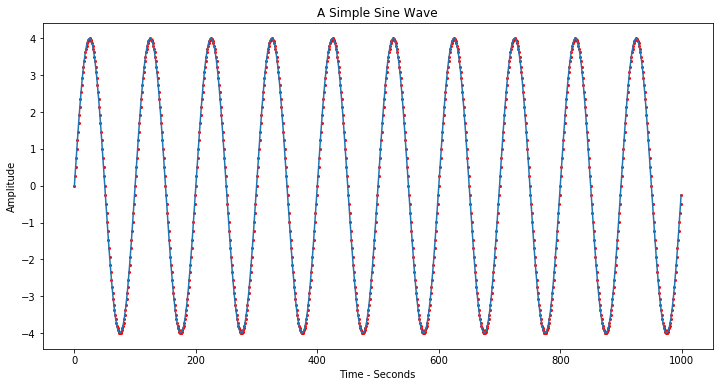

In [2]:
# create a figure and axis
f  = plt.figure(figsize=(12, 6))
ax = f.add_subplot(111)

ax.plot(t,x)
ax.scatter(t,x, s = 4,c='red')
# Labeling
ax.set_title("A Simple Sine Wave") 
ax.set_xlabel("Time - Seconds")                     
ax.set_ylabel("Amplitude") 

Time series are used in a variety of fields including: 
- statistics
- economics
- weather forecasting
- astronomy
- physics
- applied science

Analysis of these time series, or *time series analysis*, can be used to extract meaningful information from a data set such as trends (forecasting/modeling), relation of one time-series to another (regression or correlation), or frequency content and power spectra (waves).


## 2. Time Series Analysis

Time series analysis - methods for analyzing time series data to extract meaningful information from the data. Examples include:
- filtering
- principle component analysis
- singular-value decomposition
- auto-correlation and cross-correlation
- regression analysis 
- fourier analysis

## 3. The Fourier Transform

The Fourier Transform is one of the most common time series analysis tools and is used to decompose a signal (or input series) into sinusoids - cosines and sines. 

Consider a _continuous_ time series $x(t)$ which describes the quantity $x$ in the _time domain_ as a fucntion of time $t$. This same series can also be described in the _frequency_ domain by a series of cosines and sines with amplitude $X$ as function of frequency $f$.  

The functions $x(t)$ and $X(f)$ can be thought of as two seperate representations of the same function. The Fourier Transform allows us to move between these two representations: 

$$ X(f) = \int\limits_{-\infty}^{\infty} x(t)e^{\,2\pi\,i\,f\,t} dt \quad - \quad\text{ the Fourier Transform} $$ 

$$ x(t) = \int\limits_{-\infty}^{\infty} X(f)e^{\,-2\pi\,i\,f\,t} df \quad - \quad\text{ the Inverse Fourier Transform}$$ 

The Fourier Transform is a powerful tool for **spectral analysis** and characterizing the **power spectra** of a series (amplitude as a function of frequency). However, it can also be used for effeciently computing convolutions, correlations, and auto-correlations. 

**Note 1**, we've assumed $t$ is measured in seconds, thus $f$ is measured in cycles per second (Hertz). However the Fourier Transform can be applied to any data set, for example, if $x$ was a measure of position then $X$ will be a function of 1/wavelength. 

**Note 2**, in the above integrals $e^{i\theta}$ is, Euler's formula,  where $\theta = \pm 2\pi ft$ and $i=\sqrt{-1}$.
Eurlers formula establishes a relationship between trigonometric functions and complex exponential functions and is used as it often simplifies the math in difficult/complex problems. Eulers formula is given by:

$$ e^{i\theta} = \cos{\theta} + i\sin{\theta} $$


## 4. The Discrete Fourier Transform

Above we considered a continous series (note the integral form of the Fourier Transform).

In reality time series are discretized leading the Discrete Fourier Transform. 

For an $N$ point time series $x_n(t)$ indexed by $n$ and sampled at discrete intervals $\Delta$ we have:

$$ t_n = n\Delta \quad x_n = x(t_n) \quad n \in [0:N-1] $$

and the Continuous Fourier Transfrom can be generalized to the Discrete Fourier Transform given by:

$$ X_n = \sum\limits_{k=0}^{N-1} x_k \, e^{^{\,2\pi\,i\,f\,k\,n}/_N} \quad - \quad\text{ the Discrete Fourier Transform} $$ 

$$ x_k = \frac{1}{N}\sum\limits_{n=0}^{N-1} X_n \, e^{^{\,-2\pi\,i\,f\,k\,n}/_N} \quad - \quad\text{ the inverse Discrete Fourier Transform} $$

The Discrete Fourier Transform maps $N$ complex numbers $x_k$ in the time domain into $N$ complex numbers $X_n$ in the frequency domain.



**Note 1**, in the Continous Fourier Transform the integral ran from negative infinity to infinity, over both positive and negative frequencies. In the Discrete Fourier Transform the sum runs from 0 to N-1. What happened to the negative frequencies?

The Discrete Fourier Transform is periodic with period N. Thus it runs through a full $2\pi$ rotation $[0,2\pi]$ in N points. This is equivalent to saying it rotates through a full rotation from $[-\pi,\pi]$. In this convention, the first half of the Discrete Fourier Transform holds the positive frequencies and the second half holds the negative frequencies.

**Note 2**, if $x_k$ is real, as with most time series, then the Discrete Fourier Transform of $x_k$, $X_n$, is symmetric about $n=N/2$, and the imaginary component in anti-symetric about $n=N/2$. That is 

$$ X(f) = X^*(-f) \quad \text{Where * denotes the complex conjugate} $$
$$ |X(f)| = |X(-f)| $$


### The Nyquist Frequency

For any discretely sampled time series there exists a critical frequency which defines the largest frequency that can be resolved. This is the Nyquest frequency $f_c$ and is given by: 

$$ f_c = \frac{1}{2\Delta} $$

Frequencies larger then $f_c$, or periods smaller then $^1/_{f_c}$, can not be resolved as the sample resolution is to large ... or _at least two points per are required to accurately define a wave_.


### Frequency Resolution

The frequency resolution of the FFT is given by: 

$$ \delta f = \frac{1}{N\Delta} $$

And the frequencies $f_n$ can be determined from:

$$ f_n = \frac{n}{N\Delta} \quad n\in [0:^N/_2] $$

$$ f_n = \frac{n-N}{N\Delta} \quad n\in [^N/_{2+1}:N-1] $$

### Power

The power, power spectrum, or power spectral density of a signal provides an estimate of the strenght or amplitude of the signal at a given frequency $f_n$. 

When the time series $x$ is real the power spectral density can be estimated by: 

$$ P_n = \frac{2|X_n|^2}{N^2} \quad \text{for } n \in [1:^N/_2-1] $$

$$ P_n = \frac{|X_n|^2}{N^2} \quad \text{for } n = 0,^N/_2$$

In the above what is the factor of 2 for?

Why is no factor of two present for $n=0,^N/_2$?

What does the zero frequency represent?

## 5. The Fast Fourier Transform

The Discrete Fourier Transform of a series of $N$ points requires on the order $N^2$ operations to compute, $\mathit{O}\,(N^2)$. 

The Fast Fourier Transform, or **_FFT_**, reduces the number of operations required to compute the Discrete Fourier Transform. The work of J.W. Cooley and J.W. Tukey mainstreamed the idea of a Fast Fourier Transform in the 60's. 

An FFT algorithm can compute the Discrete Fourier Transform in $N\,log{_2\,N}$ operations, $\mathit{O}\,(N\,log{_2\,N})$.

Several FFT algorithms exist. We won't get into the details of these algorithms as they are not neccessary to understand and implement the FFT. A good description is provided in [Numerical Recipies](http://numerical.recipes/).

In Python FFT algorithms exist in SciPy, NumPy, and pyFFTW (a very effecient FFT).

We'll be using the FFT (and coresponding functionality) from [SciPy.FFTpack](https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html), and routines available in [SciPy.Signal](https://docs.scipy.org/doc/scipy/reference/tutorial/signal.html#spectral-analysis).

### Example 2 - The FFT of a simple sine wave

In [4]:
# Import the FFT and inverse FFT
#  and a function which calculates
#  frequencies

from scipy.fftpack import fft, ifft, fftfreq

In [5]:
# Lets compute the FFT of the simple sine
#  wave time series

# the FFT
y  = fft(x)
# and the inverse FFT
yi = ifft(y)
# frequency
f = fftfreq(n,d=res)

print(y.dtype)
print(yi.dtype)


complex128
complex128


[Text(0,0.5,'Imaginary Part of the FFT'), Text(0.5,0,'Frequency - Hz')]

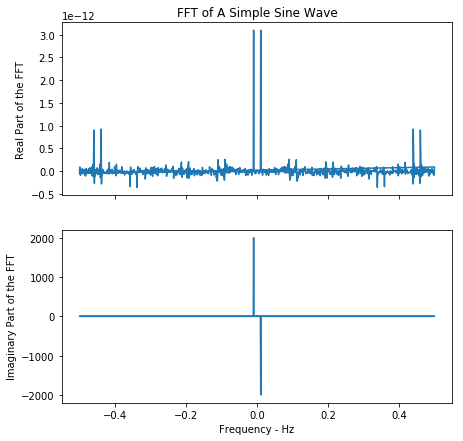

In [6]:
# create a second figure with 3 plots
f2, (fax1, fax2) = plt.subplots(2,figsize =(7,7),sharex=True)

# plot the fft
fax1.plot(f,y.real)
fax2.plot(f,y.imag)

fax1.set(ylabel='Real Part of the FFT', title='FFT of A Simple Sine Wave')
fax2.set(ylabel='Imaginary Part of the FFT', xlabel='Frequency - Hz')


[Text(0,0.5,'Amplitude of the inverse FFT'), Text(0.5,0,'Time - Seconds')]

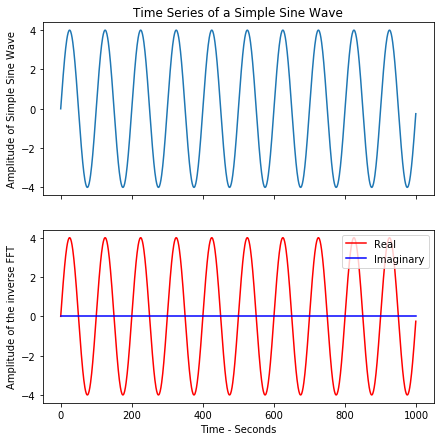

In [7]:
# plot the original and inverse fft series
f3, (tax1, tax2) = plt.subplots(2,figsize =(7,7),sharex=True, sharey=True)


tax1.plot(t,x)
tax1.set(ylabel='Amplitude of Simple Sine Wave',title='Time Series of a Simple Sine Wave')

tax2.plot(t,yi.real,c='red', label = 'Real')
tax2.plot(t,yi.imag,c='blue', label = 'Imaginary')
tax2.legend()
tax2.set(ylabel='Amplitude of the inverse FFT',xlabel='Time - Seconds')


In [8]:
# how close is imaginary
#  part of the inverse FFT
#  to zero?
zero_test = np.zeros(n)
np.allclose(zero_test,yi.imag)

True

float64 500
float64 500


[Text(0,0.5,'Power'), Text(0.5,0,'Frequency - Hz')]

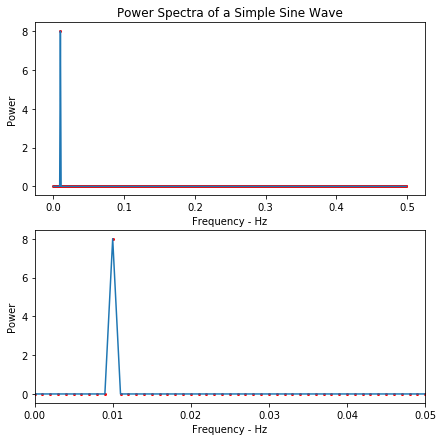

In [9]:
# lets calculate the power
#  which is defined for positive frequencies
#  n=0 -> n=N/2
p   =  2.*abs(np.copy(y[0:n//2]))**2./n**2
f_p = np.copy(f[0:n//2]) 

print(p.dtype,p.size)
print(f_p.dtype,f_p.size)

#plot power
f4, (pax1, pax2) = plt.subplots(2,figsize =(7,7))

pax1.plot(f_p,p)
pax1.scatter(f_p,p, s = 4, c='red')
pax1.set(ylabel='Power',xlabel='Frequency - Hz',title='Power Spectra of a Simple Sine Wave')


pax2.plot(f_p,p)
pax2.scatter(f_p,p, s = 4, c='red')
pax2.set_xlim(0,0.05)
pax2.set(ylabel='Power',xlabel='Frequency - Hz')


**Example 2** is an idealized example.

The frequency of the wave, 0.01 Hz, fell exactly on one of the frequencies output by the FFT, $f_{10}$.

But what happens when the frequency of a wave lies between two frequencies? Is the power spread out of those frequencies?

### Example 3 - A more _complex_ sine wave

Lets try a wave with frequency, 0.0105 Hz. 

In [10]:
# a more complex sine wave
n   = 1000
p2  = 1/0.0105
res = 1
amp = 4

t = np.arange(n)*res
x2 = amp*np.sin(2.*np.pi*(1./p2)*t)


In [11]:
# the FFT
y2  = fft(x2)
# calculate power
p2 = 2.*abs(np.copy(y2[0:n//2]))**2./n**2
# calculate the frequency axis
f2 = np.arange(n/2)*(1/(n*res)) 

print(y2.dtype,y2.size)
print(p2.dtype,p2.size)
print(f2.dtype,f2.size)


complex128 1000
float64 500
float64 500


[Text(0,0.5,'Log Power'), Text(0.5,0,'Frequency - Hz')]

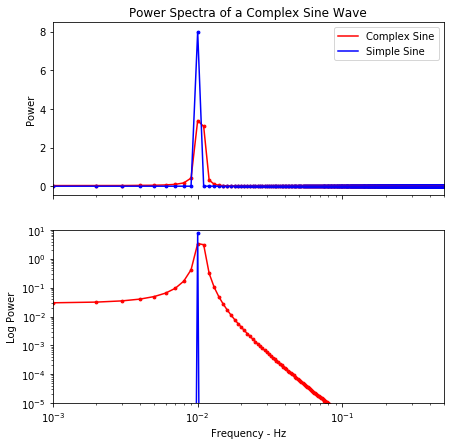

In [12]:
# plot the power
f5, (p2ax1,p2ax2) = plt.subplots(2,sharex=True, figsize=(7,7))

# linear plot
p2ax1.plot(f2,p2,c='red', label='Complex Sine')
p2ax1.scatter(f2,p2, s = 8, c='red')
p2ax1.plot(f_p,p,c='blue', label='Simple Sine')
p2ax1.scatter(f_p,p,s=8,c='blue')
p2ax1.set_xlim(f2[1],f2.max())
p2ax1.set_xscale('log')
p2ax1.set(ylabel='Power',title='Power Spectra of a Complex Sine Wave')
p2ax1.legend()

#log-log plot
p2ax2.plot(f2,p2,c='red')
p2ax2.scatter(f2,p2, s = 8, c='red')
p2ax2.plot(f_p,p,c='blue')
p2ax2.scatter(f_p,p,s=8,c='blue')
p2ax2.set_ylim(0.00001,10)
p2ax2.set_yscale("log", nonposy='clip')
p2ax2.set(ylabel='Log Power',xlabel='Frequency - Hz')



The spread in power is across the entire spectrum in frequency is **_spectral leakage_**. 


# 6. Spectral Leakage
Spectral leakage is the result of using a discrete and finite length time series or window length. 

- If a time series is periodic over the window length, $N$, no leackage occurs; the time series is a _perfect_, albiet discrete, representation of the continous signal.
- If a time series in not periodic within the window length, $N$, sharp transitions exist at the boundaries of the window leading to spectral leakage; signal levels are reduced and 'spill' over into adjecent bins.




# 7. Windowing

Windowing of a time series can reduce spectral leakage by forcing the signal to be periodic within in the window. 

A window is _applied_ to a time series by multiplying the window and time series together. 

In the above examples no window is applied. In this case the window is conidered a _boxcar_ window, which has amplitude 1 throughout the window. A _boxcar_ window **does not** force a time series to be periodic.

Other windows exist which **do** force a signal to be periodic. This is accomplisehd by forcing the ends of the time series to 0. Popular windows include:
- Hann (or hanning)
- Welch
- Bartlett
- Hamming

Each of which have there own frequency response and utility in time series analysis (narrowing the central peak vs reducing the leakage).

In Python, windowing functions exist in [SciPy Signal Processing](https://docs.scipy.org/doc/scipy/reference/signal.html).

### Example 4 - Windowing Functions

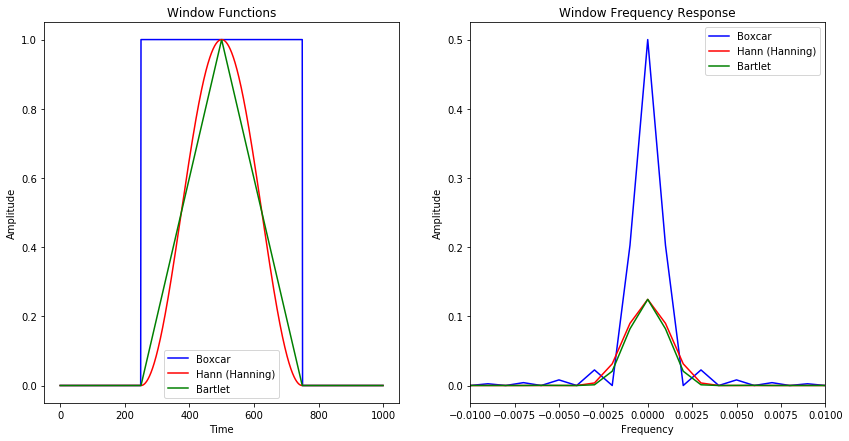

In [13]:
# A few window examples
import scipy.signal as signal

xw = np.arange(n)
fw = fftfreq(n,d=res)
# sort the frequency array which goes 0-> fc -> -fc
# such that it goes -fc -> fc
# easier for plotting
fs = np.argsort(fw)

# boxcar window and power
box  = np.zeros(n,dtype=np.float64)
box[n//4:3*n//4]  = signal.boxcar(n//2)
pbox = (2./n**2)*abs(fft(box))**2.
# hann window and power
hann = np.zeros(n,dtype=np.float64)
hann[n//4:3*n//4]  = signal.hann(n//2)
phann = (2./n**2)*abs(fft(hann))**2.
# bartlet window and power
bart = np.zeros(n,dtype=np.float64)
bart[n//4:3*n//4]  = signal.bartlett(n//2)
pbart =  (2./n**2)*abs(fft(bart))**2.

# plot the windows and the frequency response of the windows (FFT)
f6, (wax1, wax2) = plt.subplots(1,2,figsize=(14,7) )

wax1.plot(xw,box, c='blue', label='Boxcar')
wax1.plot(xw,hann, c='red', label='Hann (Hanning)')
wax1.plot(xw,bart, c='green', label='Bartlet')
wax1.set(xlabel='Time', ylabel='Amplitude', title='Window Functions')
wax1.legend( )

wax2.plot(fw[fs],pbox[fs], c='blue', label='Boxcar')
wax2.plot(fw[fs],phann[fs], c='red', label='Hann (Hanning)')
wax2.plot(fw[fs],pbart[fs], c='green', label='Bartlet')
wax2.set(xlabel='Frequency', ylabel='Amplitude',title='Window Frequency Response',
         xlim=[-0.01,0.01])
wax2.legend( )



The above shows three different windows and the frequency response of each windows. 
- the _boxcar_ response has periodic lobe structure which causes increased leakage.
- the _hann_ and _bartlet_ windows do not preserve amplitude as well as the _boxcar_ but rapidly drop off, reducing leakage.

In any FFT the frequency response of the window (above) is convolved with that of the time series. This can help to reduce leakage.

### Example 5 - Windowing the Complex Sine Wave

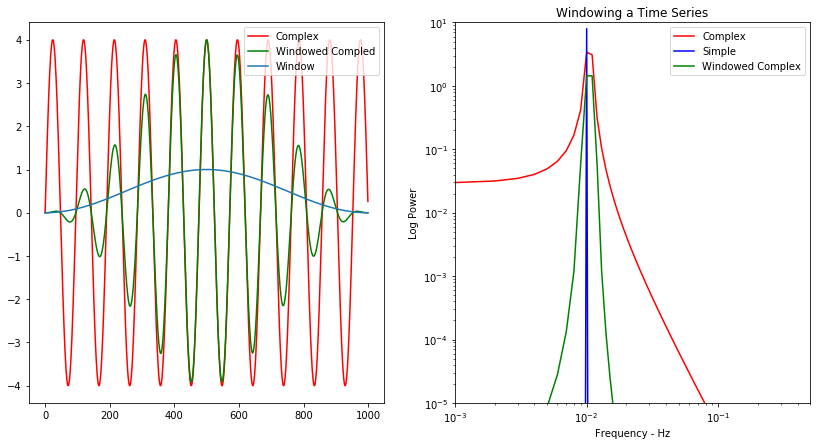

In [14]:
# let's apply a hanning window 
#  to the complex sine wave time series

y2_w  = fft(x2*signal.hann(n))
# calculate power
p2_w = 2.*abs(np.copy(y2_w[0:n//2]))**2./n**2

# plot series and power
f7, (wpax1, wpax2) = plt.subplots(1,2,figsize=(14,7) )

wpax1.plot(t,x2,c='red', label='Complex')
wpax1.plot(t,x2*signal.hann(n),c='green',label='Windowed Compled')
wpax1.plot(t,signal.hann(n), label='Window')
wpax1.legend(loc='upper right')

wpax2.plot(f2,p2,c='red', label = 'Complex')
wpax2.plot(f_p,p,c='blue', label = 'Simple')
wpax2.plot(f2,p2_w,c='green',label='Windowed Complex')
wpax2.set(ylim=[0.00001,10],yscale='log',xlim=[f2[1],f2.max()],xscale='log')
wpax2.set(ylabel='Log Power',xlabel='Frequency - Hz', title='Windowing a Time Series')
wpax2.legend(loc='upper right')



In Example 5, windowing the _complex_ sine wave reduces the leackage providing a more accurate estimation of the frequency content of the power spectra. 

This windowing also reduces the power. A correction factor can applied to the FFT to correct for this affect.  

Some additional reading on Spectral Leakage and Windows and correcting for the Power when windowing can be found at:
- [Windows and Spectral Leakage](https://community.plm.automation.siemens.com/t5/Testing-Knowledge-Base/Windows-and-Spectral-Leakage/ta-p/432760)
- [FFT Spectral Leakage and Windowing](http://saadahmad.ca/fft-spectral-leakage-and-windowing/)
- [Numerical Recipes, Data Windowing, equations 13.4.8-13.4.11](http://numerical.recipes).

Addition signal processing routines which simplify some of the analysis in the above examples exists in [SciPy Signal Processing and Spectral Analysis](https://docs.scipy.org/doc/scipy/reference/tutorial/signal.html#spectral-analysis), including: 
- the Periodgram, which simplifies the calculation of power to a single line of code.
- the Welch method, which can provide a more accurate estimation of power.
- the Spectrogram method, which can be used to visualize the change in frequency content of a time series over time.

